In [1]:
import numpy as np #untuk perhitungan saintifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression

import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df = pd.read_csv("/content/drive/MyDrive/IZZA Final Citra/readmissions-proper-onehot-with-numerical-retained.csv") #membaca data

# melihat 5 baris pertama data
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,readmitted
0,45,13,79,6,31,0,0,0,999.0,995.0,...,0,0,0,0,0,0,0,0,0,0
1,75,3,41,0,8,0,0,0,999.0,790.0,...,0,0,0,0,0,0,1,0,0,0
2,45,6,43,0,15,0,0,0,999.0,790.0,...,0,0,0,0,0,0,1,0,0,0
3,65,4,44,0,22,0,0,0,999.0,710.0,...,0,0,0,0,0,0,0,0,0,0
4,45,13,49,0,12,0,0,1,999.0,682.0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
#kita ambil kolom mana saja yang akan kita analisis, dan membuang sisanya

cdf = df[['age','time_in_hospital','num_lab_procedures','num_medications','num_procedures']]
cdf.head(9)

,age,time_in_hospital,num_lab_procedures,num_medications,num_procedures
0,45,13,79,31,6
1,75,3,41,8,0
2,45,6,43,15,0
3,65,4,44,22,0
4,45,13,49,12,0
5,85,10,36,29,5
6,75,7,71,22,1
7,95,1,54,9,0
8,45,12,64,11,2


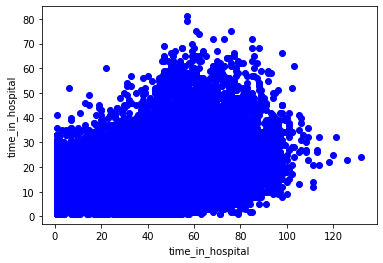

In [25]:
#Kita plot hubungannya

plt.scatter(cdf.num_lab_procedures, cdf.num_medications,  color='blue')
plt.xlabel("time_in_hospital")
plt.ylabel("time_in_hospital")
plt.show()

In [26]:
#Membagi data

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [27]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['num_lab_procedures']])
train_y = np.asanyarray(train[['num_medications']])

regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.11326819]]
Intercept:  [11.23963136]


Text(0, 0.5, 'Medication')

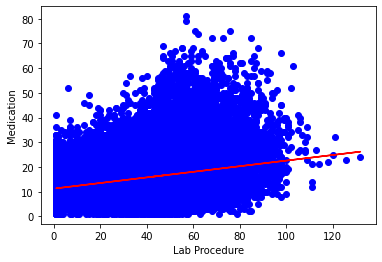

In [30]:
#Plot hasil regresi

plt.scatter(train.num_lab_procedures, train.num_medications,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Lab Procedure")
plt.ylabel("Medication")